In [54]:
# It contains all operations for building a machine learning model

Importing files/data from analysis.ipynb file for creating model

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   repo_name       1500 non-null   object
 1   star            1500 non-null   object
 2   fork            1500 non-null   object
 3   watch           1500 non-null   object
 4   issue           1500 non-null   object
 5   tags            1500 non-null   object
 6   description     1480 non-null   object
 7   contributers    1500 non-null   object
 8   license         1500 non-null   object
 9   repo_url        1500 non-null   object
 10  most_used_lang  1297 non-null   object
dtypes: object(11)
memory usage: 140.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   repo_name       1500 non-null   object
 1   star            1500 non-null   ob

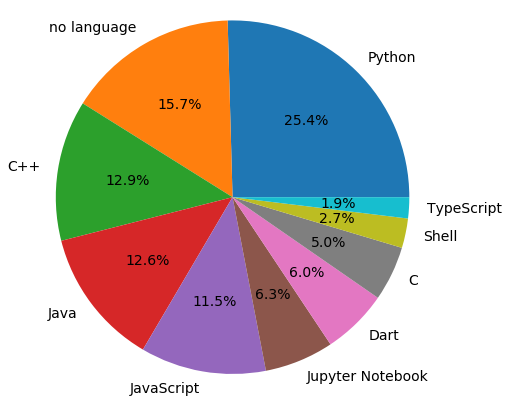

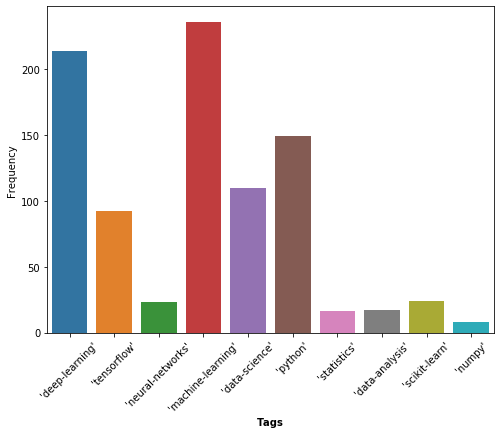

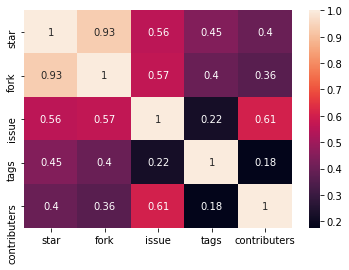

In [55]:
%run analysis.ipynb

In [56]:
data.head()

,repo_name,star,fork,watch,issue,tags,description,contributers,license,repo_url,most_used_lang
0,keras,47900,18100,2.1k,2940,9.439798,Deep Learning for humans,49,View license,https://github.com/keras-team/keras,Python
1,scikit-learn,40300,19600,2.2k,1505,6.048803,scikit-learn: machine learning in Python,108,View license,https://github.com/scikit-learn/scikit-learn,Python
2,PythonDataScienceHandbook,23100,9900,1.5k,65,2.463054,Python Data Science Handbook: full text in Jup...,0,View license,https://github.com/jakevdp/PythonDataScienceHa...,Jupyter Notebook
3,Probabilistic-Programming-and-Bayesian-Methods...,21000,6600,1.4k,127,1.752778,"aka ""Bayesian Methods for Hackers"": An introdu...",0,MIT,https://github.com/CamDavidsonPilon/Probabilis...,Jupyter Notebook
4,Data-Science--Cheat-Sheet,18400,8200,1.5k,7,0.000000,Cheat Sheets,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...,no language


Description is also play a role in the popularity of your repos, so we need to clean  `description` tuple by removing punctuations and creating word counts.

In [57]:
data['description']=data['description'].str.replace('\W'," ")
data['description']=data['description'].str.lower()

For creating word count will require all unique words in the message(vocabulary)

In [58]:
data['description']=data['description'].str.split()
vocabulary = []
for sms in data['description']:
    for word in sms:
        vocabulary.append(word)
        
vocabulary = list(set(vocabulary))

In [59]:
vocabulary[:10]

['easy',
 'stefan',
 '80',
 '为美团点评各业务线提供系统丰富的性能指标',
 'sizebox',
 'mimics',
 'spark',
 'curso',
 'anywhere',
 'restful']

From above we can see that their are some numerical values and stopwords too, so we need to remove them from vocabulary list

In [60]:
vocab = [item for item in vocabulary if not item.isdigit()]

In [61]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TUSHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
for word in stopword:
    if word in vocab:
        vocab.remove(word)

In [63]:
word_counts_per_sms = {unique_word: [0] * len(data['description']) for unique_word in vocab}

for index, lines in enumerate(data['description']):
    for word in lines:
        if word in vocab:
            word_counts_per_sms[word][index] += 1

In [64]:
word_col=pd.DataFrame(word_counts_per_sms)

Removing tuples that are required and concatenate both the dataframes

In [65]:
data.drop(['repo_name','license','repo_url','most_used_lang', 'watch', 'description'],axis=1,inplace=True)
testing_set=pd.concat([data,word_col],axis=1)

In [66]:
testing_set.head()

,star,fork,issue,tags,contributers,easy,stefan,为美团点评各业务线提供系统丰富的性能指标,sizebox,mimics,...,是使用,深度学习入门教程,receiving,汽车词库,mpu9250,date,autonomous,weex,rfid,built
0,47900,18100,2940,9.439798,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40300,19600,1505,6.048803,108,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23100,9900,65,2.463054,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21000,6600,127,1.752778,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18400,8200,7,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
## LR can be used:
# gradient descent
# reandom forest 
# NN regression (Relu)
# Lasso regression
# Ridge regression
# Elastic netregression


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(testing_set.iloc[:,1:], testing_set.iloc[:,0], test_size=0.2, random_state=42)

Gradient Descent

In [80]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(loss='squared_loss',alpha=0.01,max_iter=1500)
sgd.fit(X_train, y_train)
predictions = sgd.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

7.698433607999376e+32


Normal Equation

In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

4.5477351607136507e+18


Random forest

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=20, random_state=1)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

48050296.76612914


In [103]:
# from numpy import loadtxt
# from keras.models import Sequential
# from keras.layers import Dense
# X = testing_set.iloc[:,1:]
# y = testing_set.iloc[:,0]

# model = Sequential()
# model.add(Dense(5, input_dim=3987, activation='relu'))
# model.add(Dense(1, activation='relu'))


# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X, y, epochs=150, batch_size=10)

# _, accuracy = model.evaluate(X, y)
# print('Accuracy: %.2f' % (accuracy*100))

Lasso


In [106]:
from sklearn import linear_model
las = linear_model.Lasso(alpha=0.01,max_iter=2000)
las.fit(X_train, y_train)
predictions = las.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

257915055.9718604


In [117]:
from sklearn import linear_model
las = linear_model.Ridge(alpha=0.001,max_iter=3000)
las.fit(X_train, y_train)
predictions = las.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)
print(las.score(X_test,y_test))

281354138.2712656
0.03234468857962747


Elastic netregression

In [123]:
from sklearn.linear_model import ElasticNet
elsnr = ElasticNet(alpha=0.1,max_iter=3000)
elsnr.fit(X_train, y_train)
predictions = elsnr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)
print(elsnr.score(X_test,y_test))

69753420.39716434
0.7600985428834275
